### Import libraries, set up Alpaca API, and create function to pull stock prices from Alpaca

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Create function to pull stock data from Alpaca
def alpaca_pull(ticker):
    timeframe = "1D"

    # Set end datetime
    end_date = pd.Timestamp("2021-07-15", tz="America/New_York").isoformat()

    # Set the ticker information
    tickers = [ticker]

    # Get 3 year's worth of historical price data for Microsoft and Coca-Cola
    df_ticker = api.get_barset(
    tickers,
    timeframe,
    end=end_date,
    limit=1000,
    ).df

    return df_ticker

# Is Bitcoin a good investment for the future?
# How does Bitcoin compare to the equities and indices as an investment going forward?

### Load price data for Monte Carlo Simulations

In [5]:
# Pull AAPL prices from Alpaca and store in a dataframe
aapl_df = alpaca_pull("AAPL")

# Review first and last rows of the aapl_df
print(aapl_df.head())
print(aapl_df.tail())

# Confirm that there are no nulls in the dataframte
aapl_df.isnull().sum()

                             AAPL                                  
                             open    high     low   close    volume
time                                                               
2017-07-26 00:00:00-04:00  153.35  153.93  153.06  153.50  11524332
2017-07-27 00:00:00-04:00  153.78  153.99  147.30  150.55  27513361
2017-07-28 00:00:00-04:00  149.94  150.23  149.19  149.49  13769301
2017-07-31 00:00:00-04:00  149.90  150.33  148.13  148.77  14889914
2017-08-01 00:00:00-04:00  149.10  150.22  148.41  150.05  21068988
                             AAPL                                     
                             open    high       low   close     volume
time                                                                  
2021-07-09 00:00:00-04:00  142.73  145.65  142.6522  145.11   89995907
2021-07-12 00:00:00-04:00  146.21  146.32  144.0000  144.50   65946147
2021-07-13 00:00:00-04:00  144.06  147.46  143.6300  145.68   92084973
2021-07-14 00:00:00-04:00  148

AAPL  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [6]:
# Pull AMZN prices from Alpaca and store in a dataframe
amzn_df = alpaca_pull("AMZN")

# Review first and last rows on the amzn_df
print(amzn_df.head())
print(amzn_df.tail())

# Confirm that there are no null values in the dataframe
amzn_df.isnull().sum()

                              AMZN                                    
                              open     high      low    close   volume
time                                                                  
2017-07-26 00:00:00-04:00  1043.20  1053.20  1043.20  1053.20  1799775
2017-07-27 00:00:00-04:00  1069.73  1083.31  1040.18  1044.98  6666213
2017-07-28 00:00:00-04:00  1011.90  1032.85  1001.00  1020.01  4902480
2017-07-31 00:00:00-04:00  1019.05  1019.05   987.02   987.50  4890526
2017-08-01 00:00:00-04:00   996.11  1006.40   991.58   996.19  2947414
                              AMZN                                          
                              open       high        low      close   volume
time                                                                        
2021-07-09 00:00:00-04:00  3723.88  3748.0000  3693.3967  3717.6802  3444757
2021-07-12 00:00:00-04:00  3743.50  3757.2898  3696.7930  3718.5200  2174155
2021-07-13 00:00:00-04:00  3702.95  3773.0781  

AMZN  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [7]:
# Pull DIA prices from Alpaca and store in a dataframe
dia_df = alpaca_pull("DIA")

# Review first and last rows on the dia_df
print(dia_df.head())
print(dia_df.tail())

# Confirm that there are no null values in the dataframe
dia_df.isnull().sum()

                              DIA                                  
                             open     high     low   close   volume
time                                                               
2017-07-26 00:00:00-04:00  216.81  217.160  216.56  216.81  1831971
2017-07-27 00:00:00-04:00  217.28  217.634  212.37  213.46  2935458
2017-07-28 00:00:00-04:00  213.24  217.850  212.94  213.76  1397202
2017-07-31 00:00:00-04:00  214.38  219.030  214.23  218.69  1490731
2017-08-01 00:00:00-04:00  219.74  219.800  219.15  219.35  2020602
                              DIA                                  
                             open    high      low   close   volume
time                                                               
2021-07-09 00:00:00-04:00  346.57  349.07  345.844  348.73  4862066
2021-07-12 00:00:00-04:00  348.01  350.27  347.370  350.06  3791983
2021-07-13 00:00:00-04:00  349.53  350.25  348.850  349.05  3119601
2021-07-14 00:00:00-04:00  350.19  350.69  348.3

DIA  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [8]:
# Pull MSFT prices from Alpaca and store in a dataframe
msft_df = alpaca_pull("MSFT")

# Review first and last rows of the msft_df
print(msft_df.head())
print(msft_df.tail())

# Confirm that there are no null values in the dataframe
msft_df.isnull().sum()

                            MSFT                               
                            open   high    low  close    volume
time                                                           
2017-07-26 00:00:00-04:00  74.34  74.38  73.81  74.05  12663330
2017-07-27 00:00:00-04:00  73.76  74.42  72.32  73.15  27247287
2017-07-28 00:00:00-04:00  72.72  73.31  72.54  73.03  13851619
2017-07-31 00:00:00-04:00  73.30  73.44  72.41  72.72  17128584
2017-08-01 00:00:00-04:00  73.04  73.42  72.49  72.55  15903866
                             MSFT                                    
                             open      high     low   close    volume
time                                                                 
2021-07-09 00:00:00-04:00  275.60  278.0500  275.32  277.92  19294073
2021-07-12 00:00:00-04:00  278.94  279.7700  276.58  277.32  13358203
2021-07-13 00:00:00-04:00  277.59  282.8477  277.39  280.98  22602039
2021-07-14 00:00:00-04:00  282.26  283.6600  280.55  282.51  1929936

MSFT  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [9]:
# Pull QQQ prices from Alpaca and store in a dataframe
qqq_df = alpaca_pull("QQQ")

# Review the first and last rows of the dataframe
print(qqq_df.head())
print(qqq_df.tail())

# Confirm that there are no null values in the dataframe
qqq_df.isnull().sum()

                              QQQ                                  
                             open    high     low   close    volume
time                                                               
2017-07-26 00:00:00-04:00  143.58  143.79  143.38  143.71  13460874
2017-07-27 00:00:00-04:00  144.63  144.73  141.10  142.81  63097581
2017-07-28 00:00:00-04:00  142.00  142.91  141.72  142.69  28295604
2017-07-31 00:00:00-04:00  143.11  143.32  141.82  142.09  28324605
2017-08-01 00:00:00-04:00  142.59  142.65  142.02  142.41  16387266
                              QQQ                                   
                             open     high     low   close    volume
time                                                                
2021-07-09 00:00:00-04:00  358.17  361.500  357.57  361.00  30551524
2021-07-12 00:00:00-04:00  362.45  362.890  360.83  362.42  22879511
2021-07-13 00:00:00-04:00  362.04  365.465  361.54  362.36  35870257
2021-07-14 00:00:00-04:00  364.81  365.490

QQQ  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [10]:
# Pull SPY prices from Alpaca and load in a dataframe
spy_df = alpaca_pull("SPY")

# Review the first and last rows of spy_df
print(spy_df.head())
print(spy_df.tail())

# Confirm that there are no null values in the dataframe
spy_df.isnull().sum()

                              SPY                                    
                             open    high      low    close    volume
time                                                                 
2017-07-26 00:00:00-04:00  247.75  247.79  247.130  247.450  34672798
2017-07-27 00:00:00-04:00  247.96  248.00  245.680  247.220  56602565
2017-07-28 00:00:00-04:00  246.65  247.06  246.130  246.900  36125701
2017-07-31 00:00:00-04:00  247.37  247.48  246.530  246.740  36235893
2017-08-01 00:00:00-04:00  247.46  247.50  246.716  247.309  33209109
                              SPY                                   
                             open    high      low   close    volume
time                                                                
2021-07-09 00:00:00-04:00  432.53  435.84  430.714  435.48  59254094
2021-07-12 00:00:00-04:00  435.42  437.35  434.970  437.08  42031814
2021-07-13 00:00:00-04:00  436.26  437.84  435.310  435.62  45923305
2021-07-14 00:00:00-04:00 

SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [11]:
# Load csv with BTC daily closing prices and returns and format into dataframe compatible with MCForecastTools.py
btc = Path("./input_data/btc_mc_input.csv")
btc_df = pd.read_csv(btc, header=[0,1]).dropna().rename(columns={"Unnamed: 0_level_0": " ", "Unnamed: 1_level_0": " ", "Unnamed: 0_level_1": "time"})

# Review first and last rows of btc_df
print(btc_df.head())
print(btc_df.tail())

# Confirm that there are no null values in the dataframe
btc_df.isnull().sum()

                               BTC
         time   close daily_return
1  2013-04-29  141.96     0.049224
2  2013-04-30  135.30    -0.046915
3  2013-05-01  117.00    -0.135255
4  2013-05-02  103.43    -0.115983
5  2013-05-03   91.01    -0.120081
                                    BTC
            time     close daily_return
2995  2021-07-12  34299.94     0.017665
2996  2021-07-13  33262.65    -0.030242
2997  2021-07-14  32676.38    -0.017625
2998  2021-07-15  32878.50     0.006186
2999  2021-07-16  32122.32    -0.022999


     time            0
     close           0
BTC  daily_return    0
dtype: int64

### Set up 1000-path, 10-year Monte Carlo Simulations

In [12]:
# Set up 1000-path, 10-year Monte Carlo simulations for all entities
MC_aapl = MCSimulation(
    portfolio_data = aapl_df,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*10
)

MC_amzn = MCSimulation(
    portfolio_data = amzn_df,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*10
)

MC_btc = MCSimulation(
    portfolio_data = btc_df,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*10
)

MC_dia = MCSimulation(
    portfolio_data = dia_df,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*10
)

MC_msft = MCSimulation(
    portfolio_data = msft_df,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*10
)

MC_qqq = MCSimulation(
    portfolio_data = qqq_df,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*10
)

MC_spy = MCSimulation(
    portfolio_data = spy_df,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*10
)

### Run Monte Carlo Simulations

In [13]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_aapl.calc_cumulative_return()
MC_amzn.calc_cumulative_return()
MC_btc.calc_cumulative_return()
MC_dia.calc_cumulative_return()
MC_msft.calc_cumulative_return()
MC_qqq.calc_cumulative_return()
MC_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018447,0.997781,0.999417,0.982967,0.997674,1.001706,1.004508,0.997924,0.988074,1.003927,...,0.993027,0.998412,1.001449,0.992699,1.008989,0.998274,1.017598,1.007874,0.992572,0.994164
2,1.017232,1.008702,1.010398,0.979100,1.007374,0.999366,1.008348,1.002932,0.991726,1.006971,...,0.979294,0.962719,1.000342,1.025690,0.975078,1.002179,1.029196,1.025279,0.975611,0.979689
3,1.016322,1.008649,1.029202,0.967878,1.000183,0.998835,1.006925,1.010765,0.984045,0.997108,...,0.988873,0.965951,1.017780,1.019787,0.959676,0.984786,1.039631,1.017083,0.952515,0.987268
4,1.002746,1.006798,1.041971,0.982099,1.017138,0.986505,1.003133,1.011618,0.988983,0.999956,...,0.996849,0.959770,1.030891,0.991525,0.966418,0.977792,1.026031,1.017765,0.952098,0.987763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.529464,0.628625,5.201450,1.814404,7.182541,1.489945,7.599079,2.695366,14.774359,3.617300,...,2.085619,5.815058,1.762236,3.435429,2.569878,5.391533,6.660551,2.332965,4.856037,9.840394
2517,6.634931,0.614308,5.245533,1.841048,7.227057,1.479880,7.457764,2.698226,14.872980,3.620705,...,2.091600,5.859129,1.744859,3.534828,2.530828,5.407805,6.693202,2.360767,4.899066,9.835208
2518,6.554358,0.617220,5.163732,1.827025,7.202918,1.499435,7.410519,2.687673,14.685861,3.569920,...,2.106507,5.824573,1.774636,3.582062,2.522667,5.513627,6.820518,2.365859,4.765164,9.884042
2519,6.451562,0.605684,5.046157,1.835098,7.305836,1.484938,7.484414,2.735459,14.984721,3.629217,...,2.111851,5.843789,1.790672,3.475289,2.564140,5.553559,6.800198,2.336643,4.847921,9.820019


### Plot MC simulation paths and return distributions

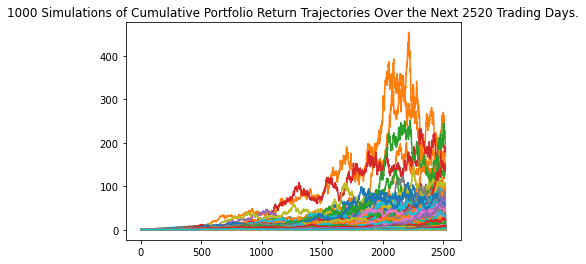

In [14]:
# Plot AAPL path simulations
aapl_plot = MC_aapl.plot_simulation()

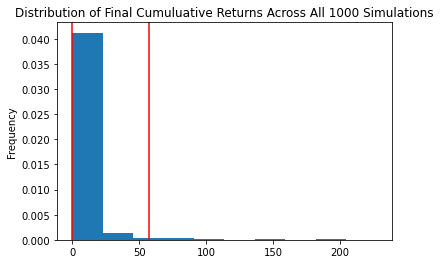

In [15]:
# Plot distribution of forecasted AAPL returns
aapl_dist = MC_aapl.plot_distribution()

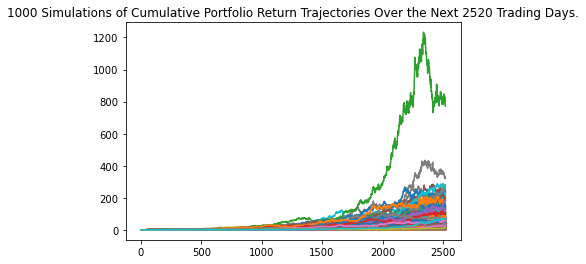

In [16]:
# Plot AMZN path simulations
amzn_plot = MC_amzn.plot_simulation()

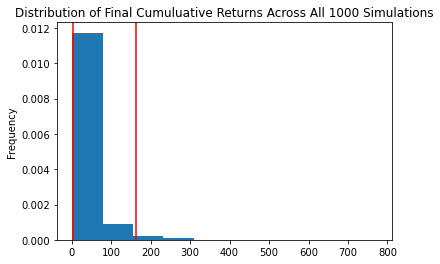

In [17]:
# Plot distribution of forecasted AMZN returns
amzn_dist = MC_amzn.plot_distribution()

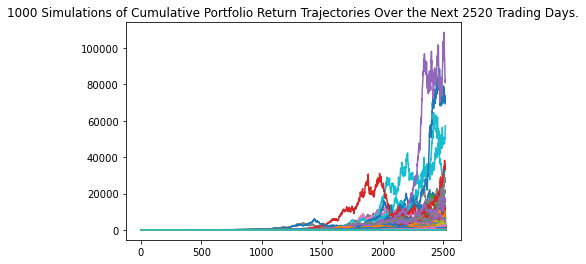

In [18]:
# Plot BTC path simulations
btc_plot = MC_btc.plot_simulation()

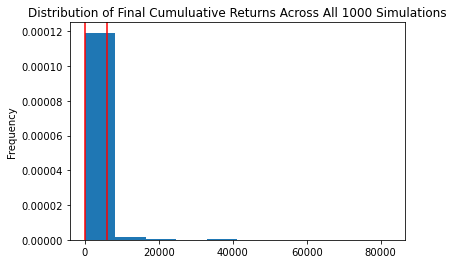

In [19]:
# Plot distribution of forecasted BTC returns
btc_dist = MC_btc.plot_distribution()

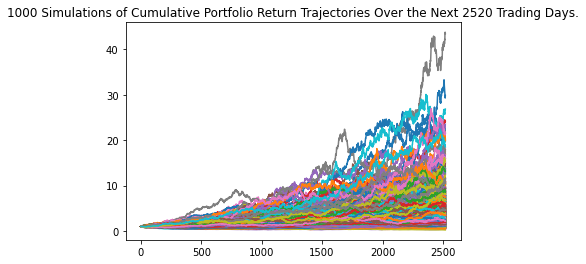

In [20]:
# Plot DIA path simulations
dia_plot = MC_dia.plot_simulation()

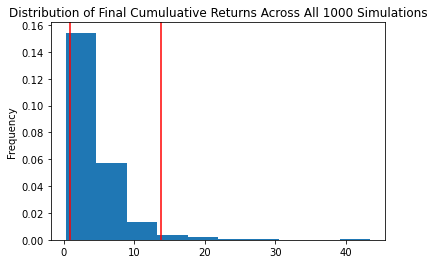

In [21]:
# Plot distribution of forecasted DIA returns
dia_dist = MC_dia.plot_distribution()

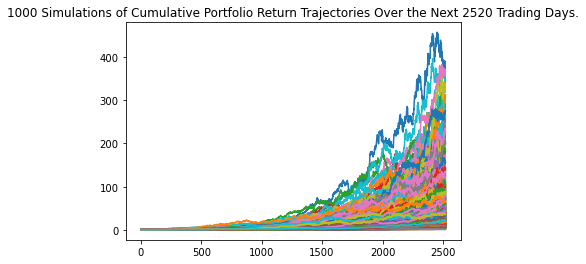

In [22]:
# Plot MSFT path simulations
msft_plot = MC_msft.plot_simulation()

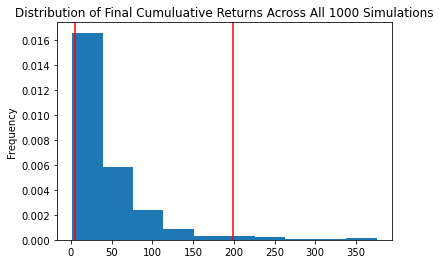

In [23]:
# Plot distribution of forecasted MSFT returns
msft_dist = MC_msft.plot_distribution()

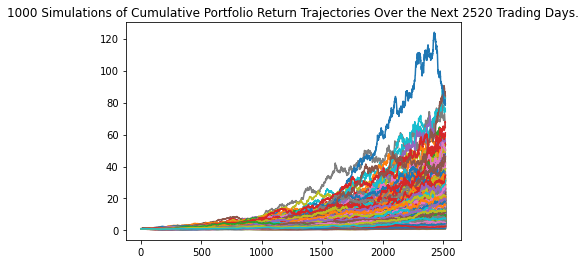

In [24]:
# Plot QQQ path simulations
qqq_plot = MC_qqq.plot_simulation()

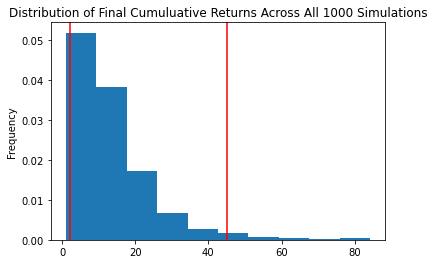

In [25]:
# Plot distribution of forecasted QQQ returns
qqq_dist = MC_qqq.plot_distribution()

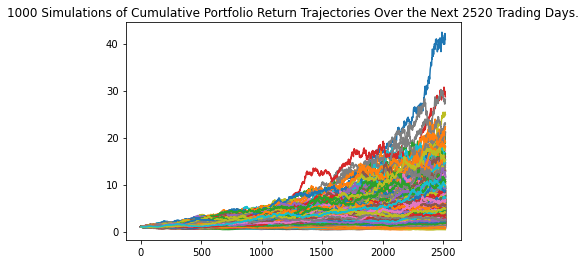

In [26]:
# Plot SPY path simulations
spy_plot = MC_spy.plot_simulation()

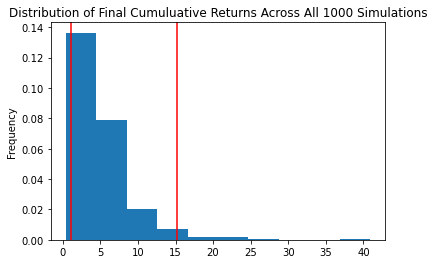

In [27]:
# Plot distribution of forecasted SPY returns
spy_dist = MC_spy.plot_distribution()

### Summarize Monte Carlo forecast results

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
aapl_stats = MC_aapl.summarize_cumulative_return()
amzn_stats = MC_amzn.summarize_cumulative_return()
btc_stats = MC_btc.summarize_cumulative_return()
dia_stats = MC_dia.summarize_cumulative_return()
msft_stats = MC_msft.summarize_cumulative_return()
qqq_stats = MC_qqq.summarize_cumulative_return()
spy_stats = MC_spy.summarize_cumulative_return()

# Print summary statistics
print(f"Apple Forecast Statistics:", '\n', aapl_stats, '\n')
print(f"Amazon Forecast Statistics:", '\n', amzn_stats, '\n')
print(f"Bitcoin Forecast Statistics:", '\n', btc_stats, '\n')
print(f"DJIA ETF Forecast Statistics:", '\n', dia_stats, '\n')
print(f"MSFT Forecast Statistics:", '\n', msft_stats, '\n')
print(f"QQQ Forecast Statistics:", '\n', qqq_stats, '\n')
print(f"SPY Forecast Statistics:", '\n', spy_stats, '\n')

# Save forecast summary statistics in a text file:
# Source: https://stackoverflow.com/questions/36571560/directing-print-output-to-a-txt-file
with open("./mc_results_summary/fcst_summ_stats.txt", "w") as file:
    print(f"Apple Forecast Statistics:", '\n', aapl_stats, '\n', file=file)
    print(f"Amazon Forecast Statistics:", '\n', amzn_stats, '\n', file=file)
    print(f"Bitcoin Forecast Statistics:", '\n', btc_stats, '\n', file=file)
    print(f"DJIA ETF Forecast Statistics:", '\n', dia_stats, '\n', file=file)
    print(f"MSFT Forecast Statistics:", '\n', msft_stats, '\n', file=file)
    print(f"QQQ Forecast Statistics:", '\n', qqq_stats, '\n', file=file)
    print(f"SPY Forecast Statistics:", '\n', spy_stats, '\n', file=file)

Apple Forecast Statistics: 
 count           1000.000000
mean               7.262627
std               19.380000
min                0.009350
25%                0.684165
50%                1.898991
75%                5.594862
max              227.185152
95% CI Lower       0.106023
95% CI Upper      57.654661
Name: 2520, dtype: float64 

Amazon Forecast Statistics: 
 count           1000.000000
mean              36.072520
std               47.706753
min                1.183166
25%               11.489766
50%               22.023033
75%               41.490949
max              772.328916
95% CI Lower       3.344984
95% CI Upper     163.296020
Name: 2520, dtype: float64 

Bitcoin Forecast Statistics: 
 count            1000.000000
mean              920.609097
std              4550.912895
min                 0.126621
25%                23.555982
50%                95.738844
75%               444.085745
max             82301.302221
95% CI Lower        1.448392
95% CI Upper     5978.109418
Na

In [31]:
# Define initial investment amount
initial_investment = 10000

# Define AAPL confidence intervals & median
aapl_ci_lower = round(aapl_stats[8] * initial_investment, 2)
aapl_ci_upper = round(aapl_stats[9] * initial_investment, 2)
aapl_median = round(aapl_stats[5] * initial_investment, 2)

# Define AMZN confidence intervals & median
amzn_ci_lower = round(amzn_stats[8] * initial_investment, 2)
amzn_ci_upper = round(amzn_stats[9] * initial_investment, 2)
amzn_median = round(amzn_stats[5] * initial_investment, 2)

# Define BTC confidence intervals & median
btc_ci_lower = round(btc_stats[8] * initial_investment, 2)
btc_ci_upper = round(btc_stats[9] * initial_investment, 2)
btc_median = round(btc_stats[5] * initial_investment, 2)

# Define DIA confidence intervals & median
dia_ci_lower = round(dia_stats[8] * initial_investment, 2)
dia_ci_upper = round(dia_stats[9] * initial_investment, 2)
dia_median = round(dia_stats[5] * initial_investment, 2)

# Define MSFT confidence intervals & median
msft_ci_lower = round(msft_stats[8] * initial_investment, 2)
msft_ci_upper = round(msft_stats[9] * initial_investment, 2)
msft_median = round(msft_stats[5] * initial_investment, 2)

# Define QQQ confidence intervals & median
qqq_ci_lower = round(qqq_stats[8] * initial_investment, 2)
qqq_ci_upper = round(qqq_stats[9] * initial_investment, 2)
qqq_median = round(qqq_stats[5] * initial_investment, 2)

# Define SPY confidence intervals & median
spy_ci_lower = round(spy_stats[8] * initial_investment, 2)
spy_ci_upper = round(spy_stats[9] * initial_investment, 2)
spy_median = round(spy_stats[5] * initial_investment, 2)

# Print confidence interval and median summaries for all entities in comparison
print(f"Apple Forecast Summary:")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in AAPL"
      f" will be worth between ${aapl_ci_lower} and ${aapl_ci_upper} in 10 years.")
print(f"The median expected value of a current ${initial_investment} investment in AAPL "
      f"is ${aapl_median} in 10 years.", '\n')

print(f"Amazon Forecast Summary:")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in AMZN"
      f" will be worth between ${amzn_ci_lower} and ${amzn_ci_upper} in 10 years.")
print(f"The median expected value of a current ${initial_investment} investment in AMZN "
      f"is ${amzn_median} in 10 years.", '\n')

print(f"Bitcoin Forecast Summary:")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in BTC"
      f" will be worth between ${btc_ci_lower} and ${btc_ci_upper} in 10 years.")
print(f"The median expected value of a current ${initial_investment} investment in BTC "
      f"is ${btc_median} in 10 years.", '\n')

print(f"DJIA ETF Forecast Summary:")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in DIA"
      f" will be worth between ${dia_ci_lower} and ${dia_ci_upper} in 10 years.")
print(f"The median expected value of a current ${initial_investment} investment in DIA "
      f"is ${dia_median} in 10 years.", '\n')

print(f"Microsoft Forecast Summary:")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in MSFT"
      f" will be worth between ${msft_ci_lower} and ${msft_ci_upper} in 10 years.")
print(f"The median expected value of a current ${initial_investment} investment in MSFT "
      f"is ${msft_median} in 10 years.", '\n')

print(f"QQQ Forecast Summary:")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in QQQ"
      f" will be worth between ${qqq_ci_lower} and ${qqq_ci_upper} in 10 years.")
print(f"The median expected value of a current ${initial_investment} investment in QQQ "
      f"is ${qqq_median} in 10 years.", '\n')

print(f"SPY Forecast Summary:")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in SPY"
      f" will be worth between ${spy_ci_lower} and ${spy_ci_upper} in 10 years.")
print(f"The median expected value of a current ${initial_investment} investment in SPY "
      f"is ${spy_median} in 10 years.", '\n')

# Save summaries to text file
# Source: https://stackoverflow.com/questions/36571560/directing-print-output-to-a-txt-file
with open("./mc_results_summary/fcst_ci_median_summ.txt", "w") as file:
    print(f"Apple Forecast Summary:", file=file)
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in AAPL"
      f" will be worth between ${aapl_ci_lower} and ${aapl_ci_upper} in 10 years.", file=file)
    print(f"The median expected value of a current ${initial_investment} investment in AAPL "
      f"is ${aapl_median} in 10 years.", '\n', file=file)
    print(f"Amazon Forecast Summary:", file=file)
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in AMZN"
      f" will be worth between ${amzn_ci_lower} and ${amzn_ci_upper} in 10 years.", file=file)
    print(f"The median expected value of a current ${initial_investment} investment in AMZN "
      f"is ${amzn_median} in 10 years.", '\n', file=file)
    print(f"Bitcoin Forecast Summary:", file=file)
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in BTC"
      f" will be worth between ${btc_ci_lower} and ${btc_ci_upper} in 10 years.", file=file)
    print(f"The median expected value of a current ${initial_investment} investment in BTC "
      f"is ${btc_median} in 10 years.", '\n', file=file)
    print(f"DJIA ETF Forecast Summary:", file=file)
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in DIA"
      f" will be worth between ${dia_ci_lower} and ${dia_ci_upper} in 10 years.", file=file)
    print(f"The median expected value of a current ${initial_investment} investment in DIA "
      f"is ${dia_median} in 10 years.", '\n', file=file)
    print(f"Microsoft Forecast Summary:", file=file)
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in MSFT"
      f" will be worth between ${msft_ci_lower} and ${msft_ci_upper} in 10 years.", file=file)
    print(f"The median expected value of a current ${initial_investment} investment in MSFT "
      f"is ${msft_median} in 10 years.", '\n', file=file)
    print(f"QQQ Forecast Summary:", file=file)
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in QQQ"
      f" will be worth between ${qqq_ci_lower} and ${qqq_ci_upper} in 10 years.", file=file)
    print(f"The median expected value of a current ${initial_investment} investment in QQQ "
      f"is ${qqq_median} in 10 years.", '\n', file=file)
    print(f"SPY Forecast Summary:", file=file)
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in SPY"
      f" will be worth between ${spy_ci_lower} and ${spy_ci_upper} in 10 years.", file=file)
    print(f"The median expected value of a current ${initial_investment} investment in SPY "
      f"is ${spy_median} in 10 years.", '\n', file=file)

Apple Forecast Summary:
There is a 95% chance that an initial investment of $10000 in AAPL will be worth between $1060.23 and $576546.61 in 10 years.
The median expected value of a current $10000 investment in AAPL is $18989.91 in 10 years. 

Amazon Forecast Summary:
There is a 95% chance that an initial investment of $10000 in AMZN will be worth between $33449.84 and $1632960.2 in 10 years.
The median expected value of a current $10000 investment in AMZN is $220230.33 in 10 years. 

Bitcoin Forecast Summary:
There is a 95% chance that an initial investment of $10000 in BTC will be worth between $14483.92 and $59781094.18 in 10 years.
The median expected value of a current $10000 investment in BTC is $957388.44 in 10 years. 

DJIA ETF Forecast Summary:
There is a 95% chance that an initial investment of $10000 in DIA will be worth between $7902.37 and $137357.43 in 10 years.
The median expected value of a current $10000 investment in DIA is $34182.52 in 10 years. 

Microsoft Forecast S